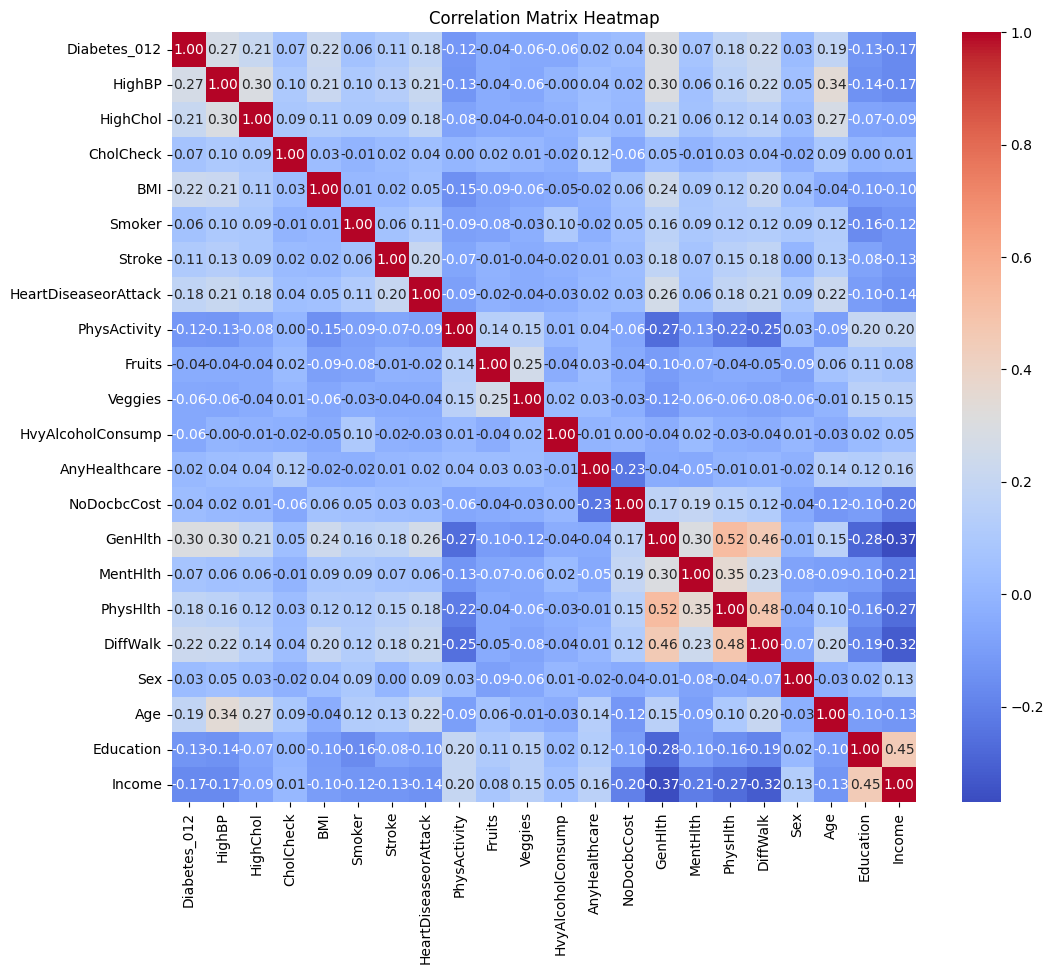

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

url = 'https://drive.google.com/uc?id=1qKlywkZUCyQkLYDFOs_T8YUaW-TG6mEb'

# Read CSV
df = pd.read_csv(url)

correlation_matrix = df.corr()

plt.figure(figsize=(12, 10))  # Optional: Make plot bigger for readability
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()



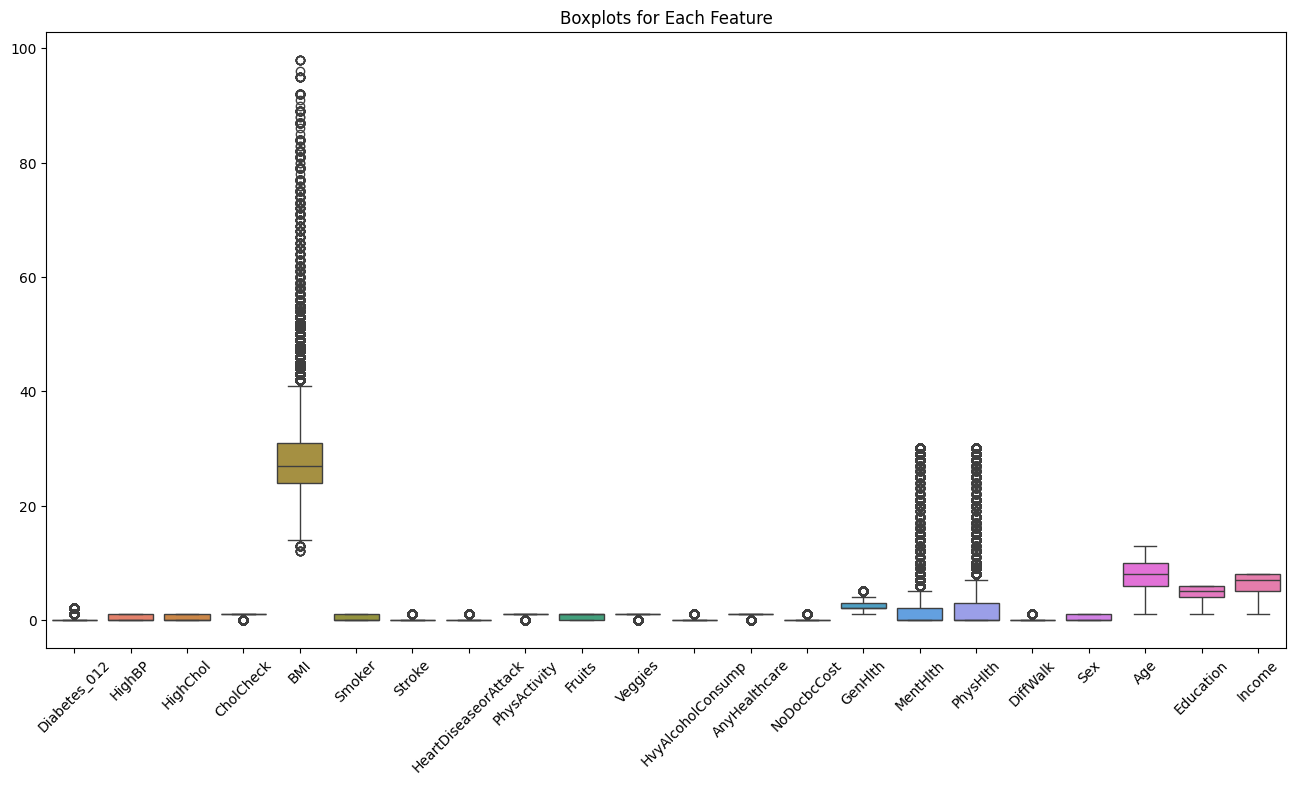

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Correct downloadable link
url = 'https://drive.google.com/uc?id=1qKlywkZUCyQkLYDFOs_T8YUaW-TG6mEb'

# Read CSV
df = pd.read_csv(url)

# Plot boxplots
plt.figure(figsize=(16, 8))
sns.boxplot(data=df)
plt.xticks(rotation=45)
plt.title('Boxplots for Each Feature')
plt.show()


In [ ]:
# Step 1: Identify binary and continuous columns
binary_cols = [col for col in df.columns if sorted(df[col].dropna().unique()) == [0, 1]]
continuous_cols = [col for col in df.columns if col not in binary_cols]

print("Binary columns:", binary_cols)
print("Continuous columns:", continuous_cols)

# Step 2: Calculate Q1, Q2, Q3, IQR only for continuous columns
Q1 = df[continuous_cols].quantile(0.25)
Q2 = df[continuous_cols].quantile(0.50)  # Median
Q3 = df[continuous_cols].quantile(0.75)
IQR = Q3 - Q1

print("\nQ1:\n", Q1)
print("\nQ2 (Median):\n", Q2)
print("\nQ3:\n", Q3)
print("\nIQR:\n", IQR)

# Step 3: Remove outliers for continuous columns only
# (Binary columns are untouched)
filter_condition = ~((df[continuous_cols] < (Q1 - IQR)) | (df[continuous_cols] > (Q3 + IQR))).any(axis=1)
df_clean = df[filter_condition]

print("\nOriginal shape:", df.shape)
print("Cleaned shape:", df_clean.shape)


Binary columns: ['HighBP', 'HighChol', 'CholCheck', 'Smoker', 'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'DiffWalk', 'Sex']
Continuous columns: ['Diabetes_012', 'BMI', 'GenHlth', 'MentHlth', 'PhysHlth', 'Age', 'Education', 'Income']

Q1:
 Diabetes_012     0.0
BMI             24.0
GenHlth          2.0
MentHlth         0.0
PhysHlth         0.0
Age              6.0
Education        4.0
Income           5.0
Name: 0.25, dtype: float64

Q2 (Median):
 Diabetes_012     0.0
BMI             27.0
GenHlth          2.0
MentHlth         0.0
PhysHlth         0.0
Age              8.0
Education        5.0
Income           7.0
Name: 0.5, dtype: float64

Q3:
 Diabetes_012     0.0
BMI             31.0
GenHlth          3.0
MentHlth         2.0
PhysHlth         3.0
Age             10.0
Education        6.0
Income           8.0
Name: 0.75, dtype: float64

IQR:
 Diabetes_012    0.0
BMI             7.0
GenHlth         1.0
MentHlth

In [ ]:
# Plot boxplots
plt.figure(figsize=(16, 8))
sns.boxplot(data=df_clean)
plt.xticks(rotation=45)
plt.title('Boxplots for Each Feature (after removing outliers for continuous features)')
plt.show()

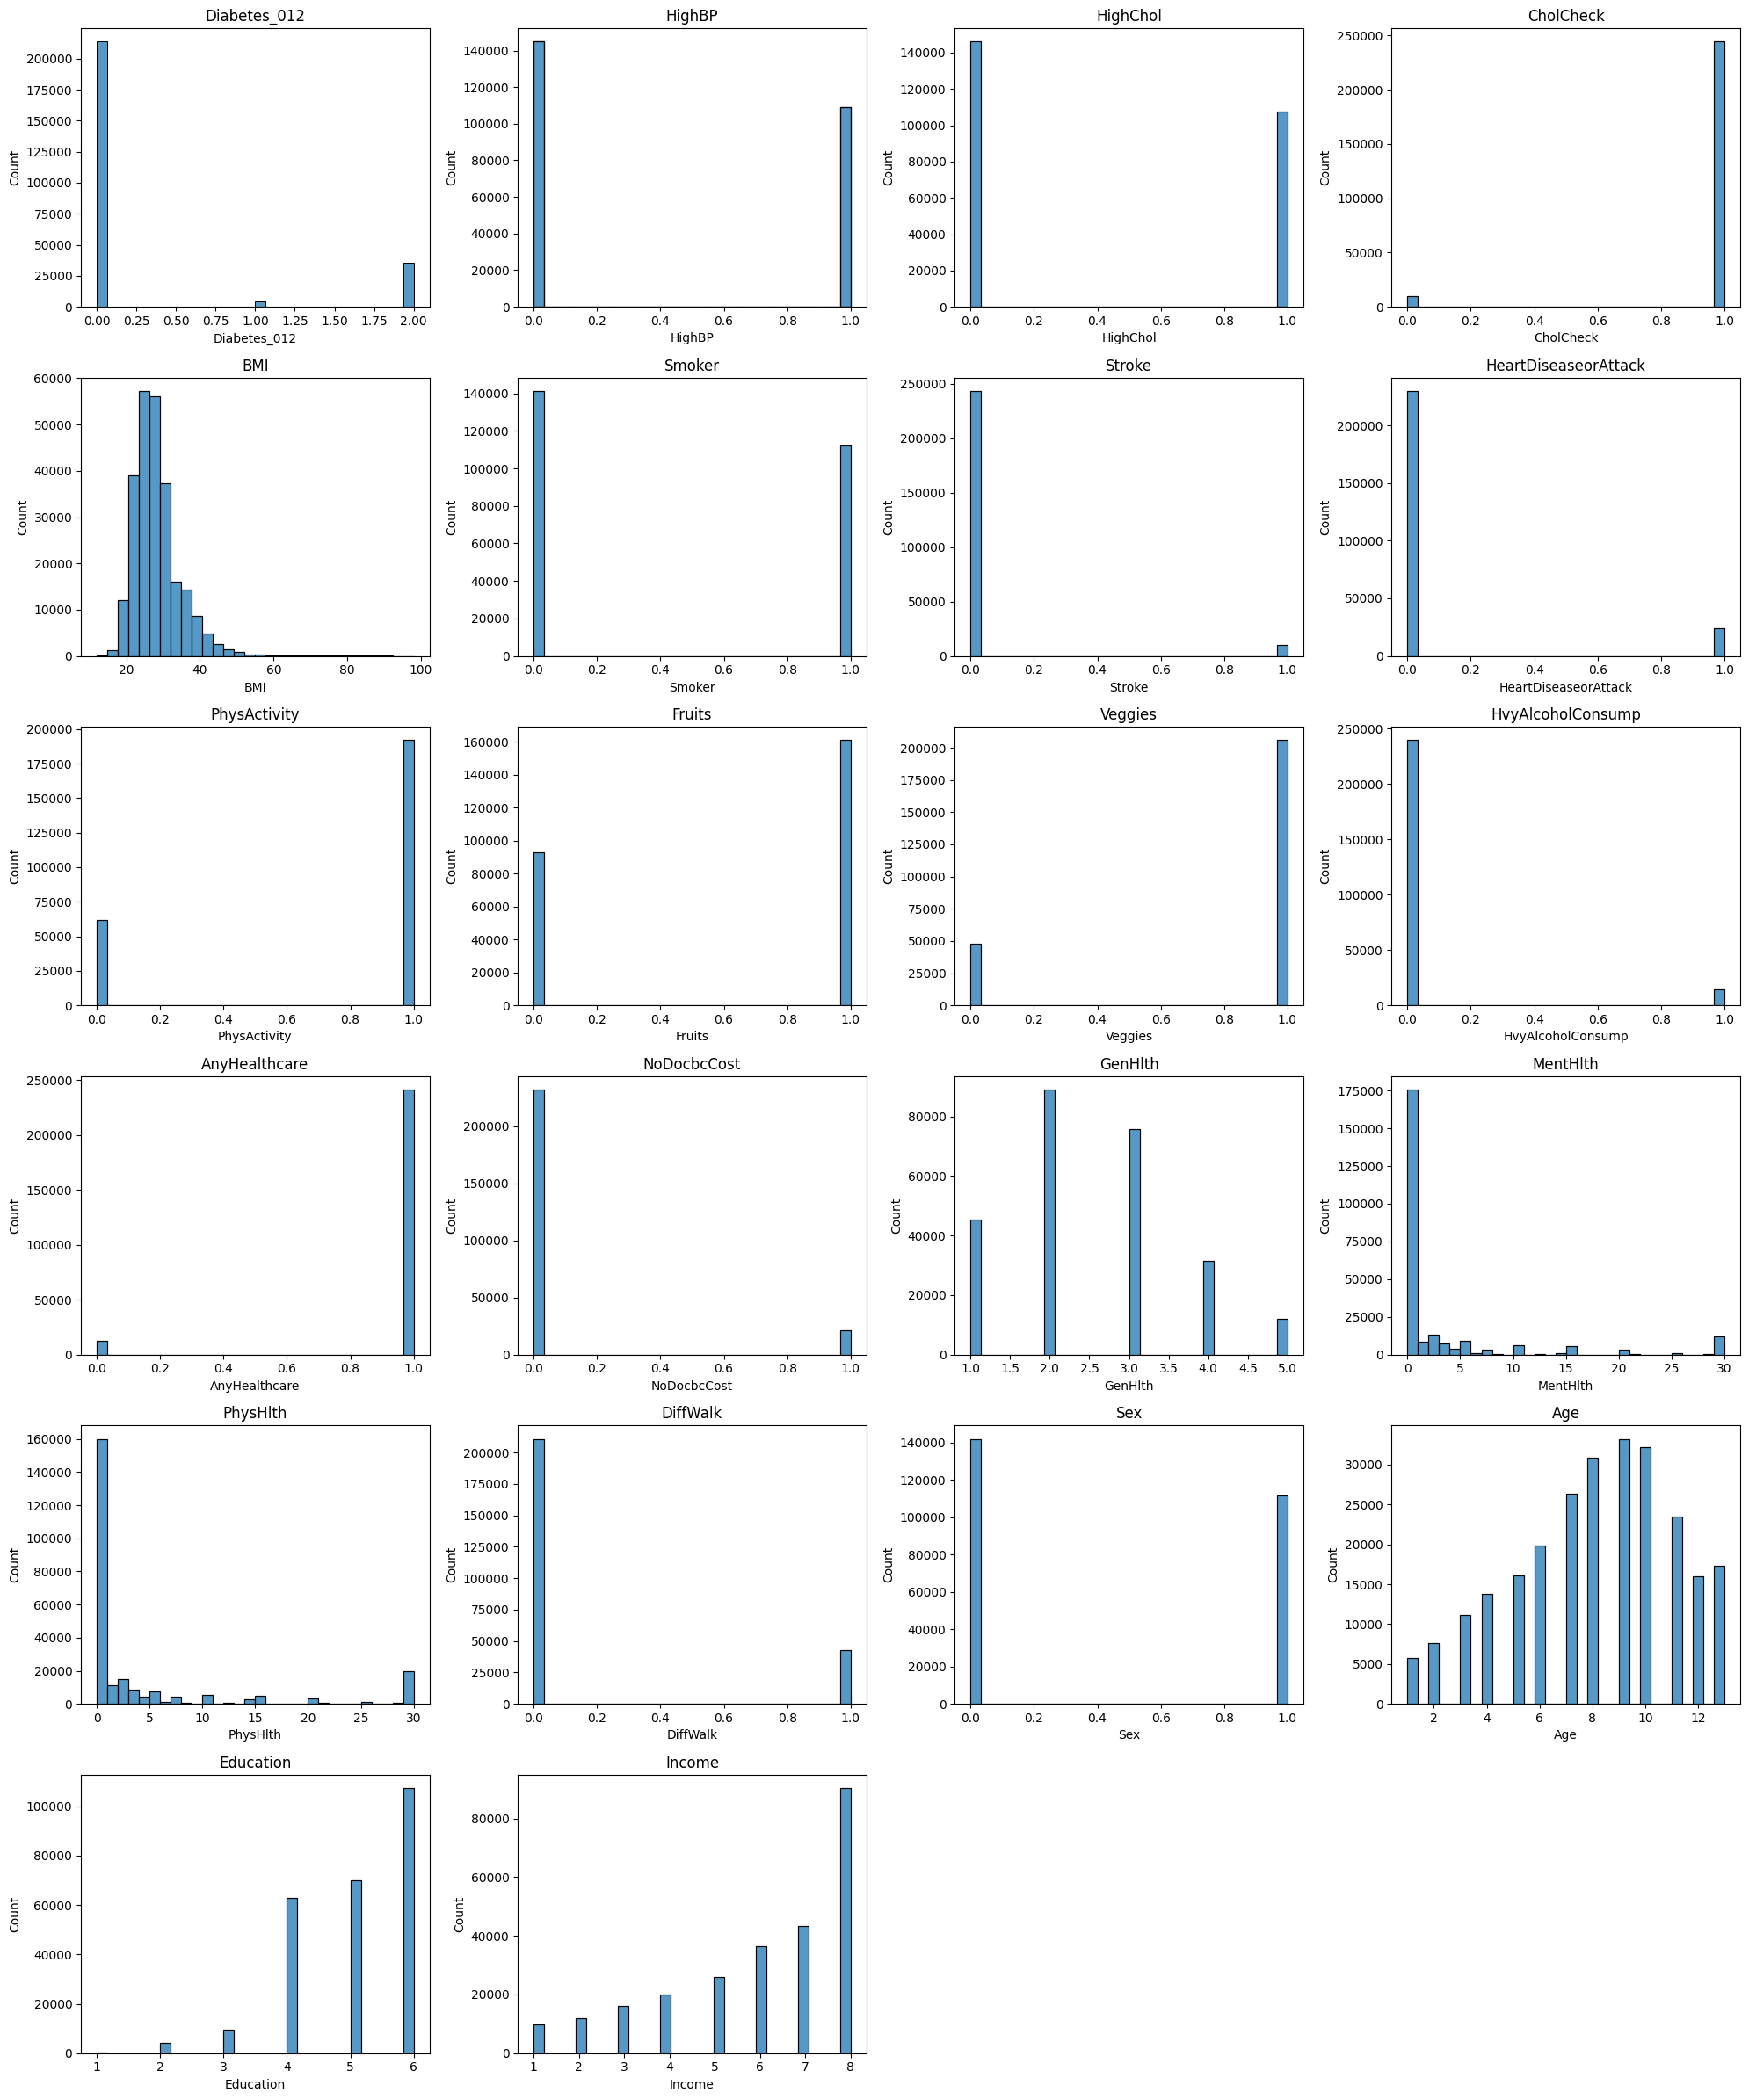

In [ ]:
n_cols = 4
n_rows = (len(df.columns) + n_cols - 1) // n_cols

plt.figure(figsize=(20, n_rows * 4))

for i, col in enumerate(df.columns):
    plt.subplot(n_rows, n_cols, i + 1)
    sns.histplot(df[col], bins=30, kde=False)
    plt.title(col)
    plt.tight_layout()

plt.show()


### **3 layers with 8 neurons**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

url = 'https://drive.google.com/uc?id=1qKlywkZUCyQkLYDFOs_T8YUaW-TG6mEb'# original dataset
url2 = 'https://drive.google.com/file/d/1PQrL_ergL1pm6zcghtIzoK7L3eLZ-dJ3/view?usp=sharing' # cleaned dataset, removing outliers
# Read CSV
df = pd.read_csv(url)

# Target is the first column
y = df.iloc[:, 0].values

# Features are the remaining 21 columns
X = df.iloc[:, 1:].values

# Encode target labels
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Automatically detect number of classes
num_classes = len(np.unique(y_encoded))
y_categorical = to_categorical(y_encoded, num_classes=num_classes)

# Train/test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y_categorical, test_size=0.2, random_state=42)

# Standardize features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# ---- Define ANN Model ----
model = Sequential()
model.add(Dense(8, input_dim=21, activation='sigmoid'))   # First hidden layer
model.add(Dense(8, activation='sigmoid'))                # Second hidden layer
model.add(Dense(8, activation='sigmoid'))                 # Third hidden layer
model.add(Dense(3, activation='softmax'))                 # Output layer for 3 classes

# ---- Compile Model ----
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# ---- Train Model ----
model.fit(X_train, y_train, epochs=30, batch_size=16, validation_split=0.1)

# ---- Evaluate ----
loss, acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {acc:.4f}")


Calculating correlations: 100%|██████████| 22/22 [00:00<00:00, 22.04it/s]


<Figure size 2000x1600 with 0 Axes>

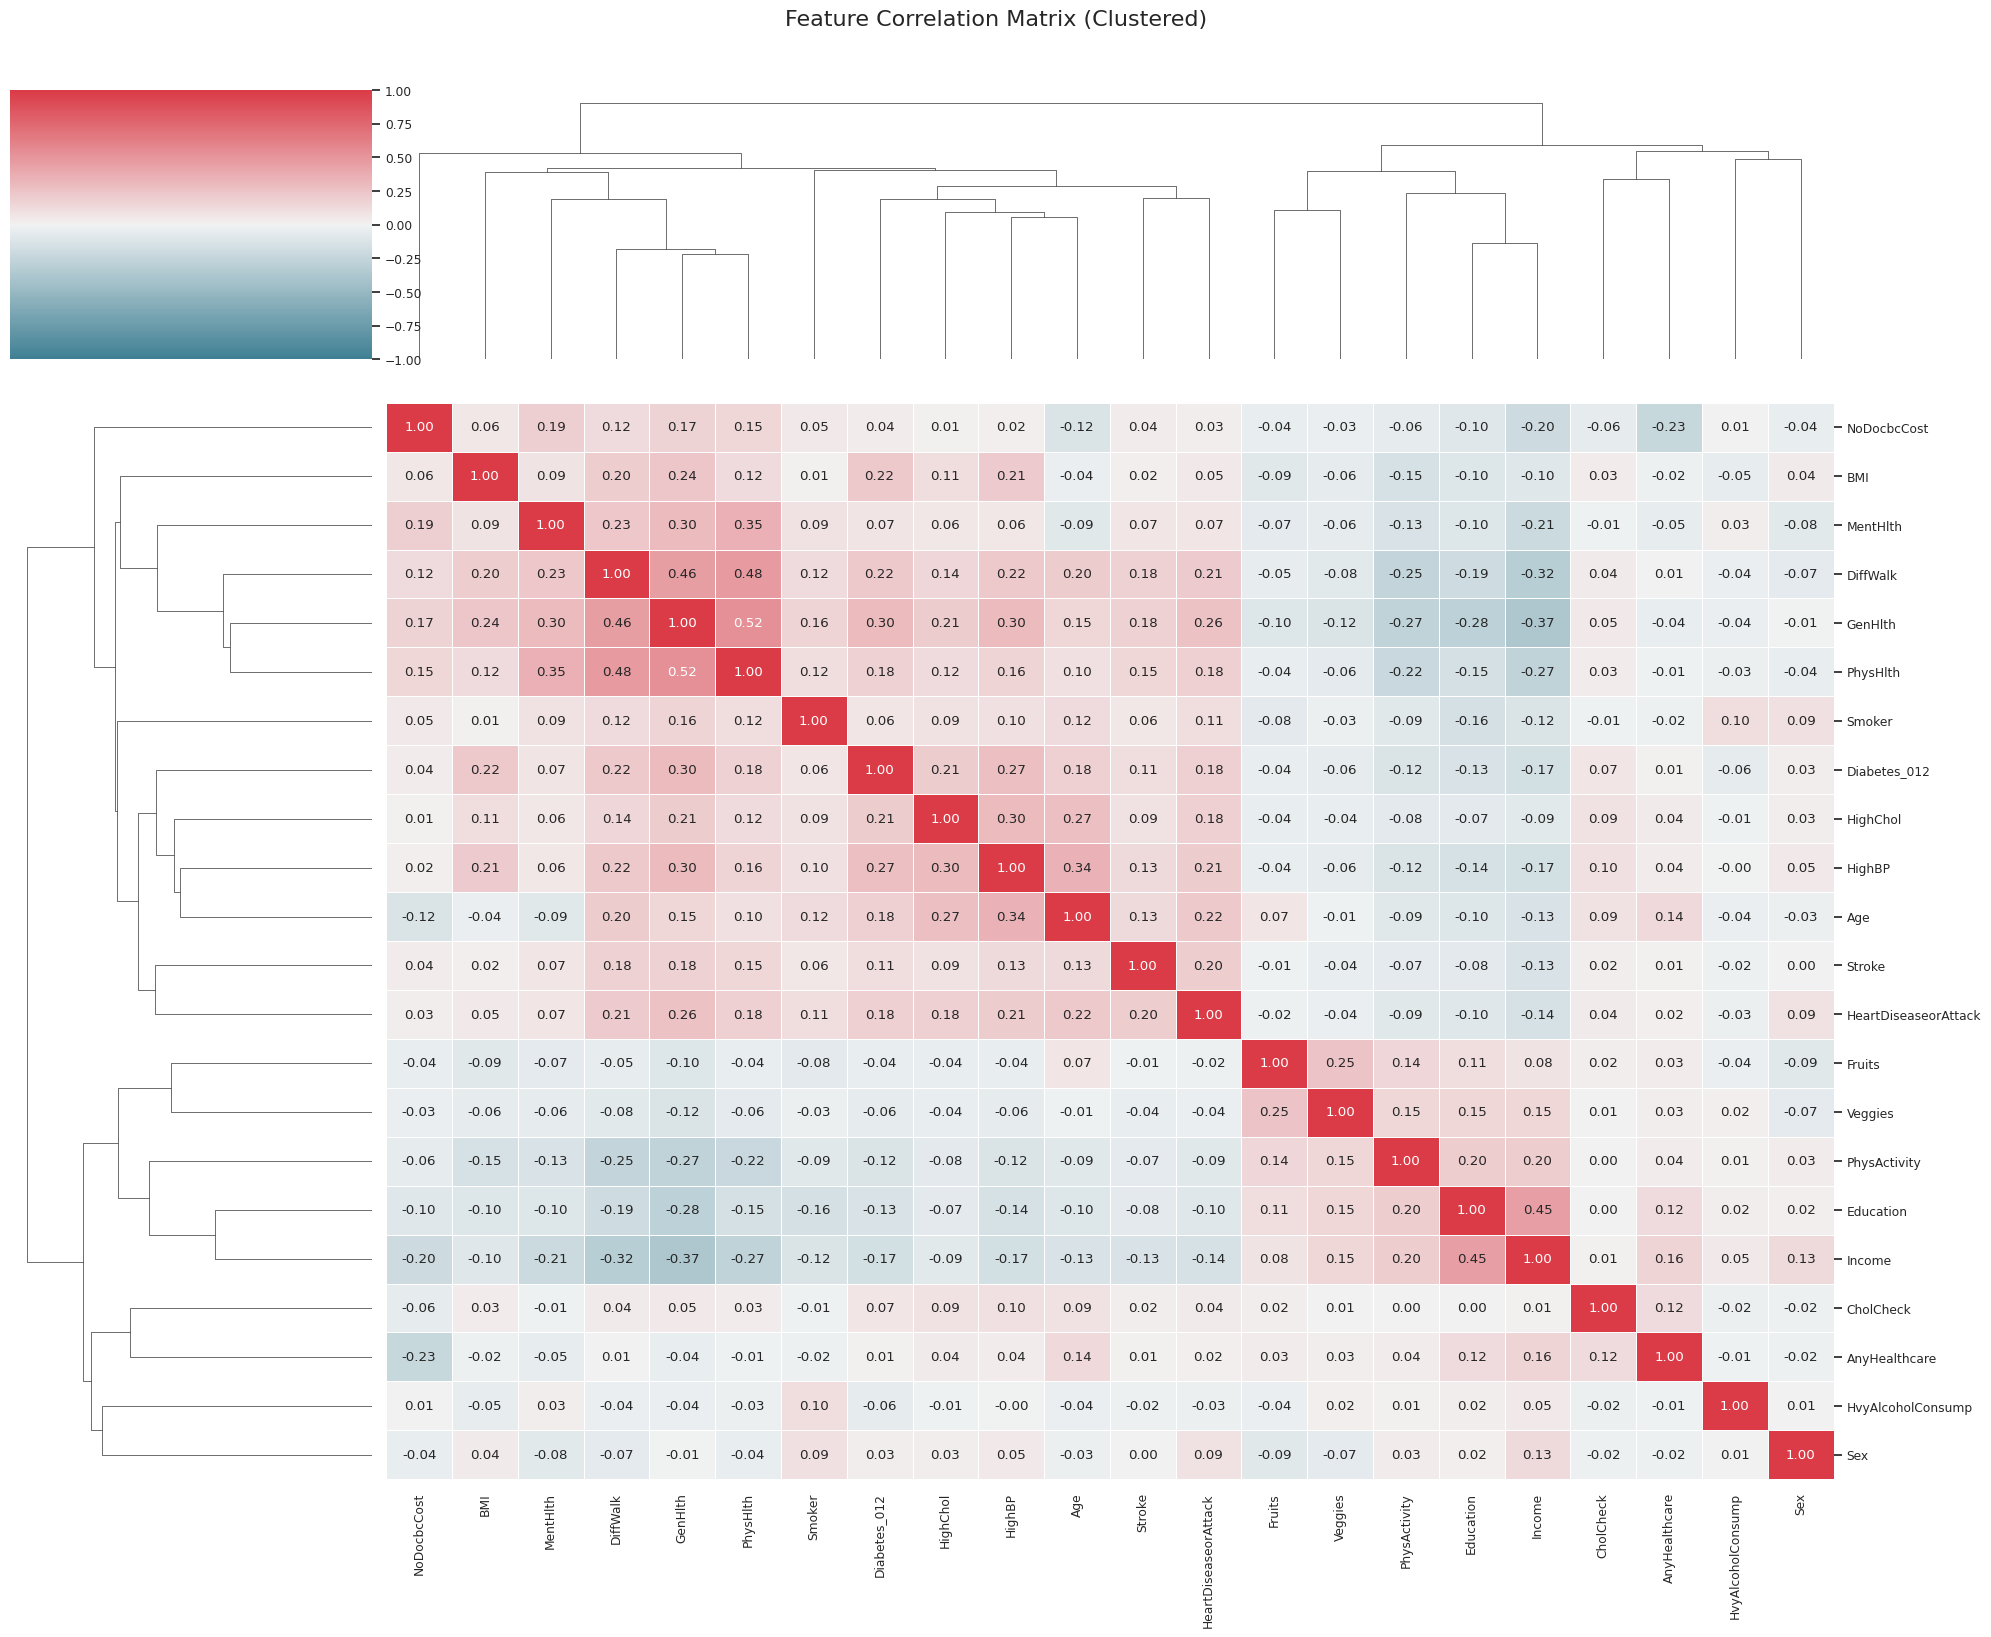

In [3]:
import pandas as pd
import numpy as np
from scipy.stats import pearsonr, pointbiserialr
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm import tqdm

# Load dataset
url = 'https://drive.google.com/uc?id=1qKlywkZUCyQkLYDFOs_T8YUaW-TG6mEb'
df = pd.read_csv(url)

# Make a copy of the dataset
df_mixed = df.copy()

# Identify binary columns
is_binary = {col: df_mixed[col].nunique() == 2 for col in df_mixed.columns}

# Initialize empty correlation matrix
corr_matrix = pd.DataFrame(index=df_mixed.columns, columns=df_mixed.columns, dtype=float)

# Compute correlations with progress bar
for i, col1 in enumerate(tqdm(df_mixed.columns, desc="Calculating correlations")):
    for j, col2 in enumerate(df_mixed.columns[:i+1]):  # Only compute lower triangle
        x = df_mixed[col1]
        y = df_mixed[col2]

        if col1 == col2:
            corr = 1.0
        else:
            try:
                if is_binary[col1] and is_binary[col2]:
                    corr = pearsonr(x, y)[0]
                elif is_binary[col1]:
                    corr = pointbiserialr(y, x)[0]
                elif is_binary[col2]:
                    corr = pointbiserialr(x, y)[0]
                else:
                    corr = pearsonr(x, y)[0]
            except:
                corr = np.nan

        # Assign both symmetric entries
        corr_matrix.loc[col1, col2] = round(corr, 3)
        corr_matrix.loc[col2, col1] = round(corr, 3)

# Option 1: Replace NaNs with 0 for full visualization (or use mask for Option 2)
corr_matrix.fillna(0, inplace=True)

# Plot clustered heatmap
plt.figure(figsize=(20, 16))
sns.set(font_scale=0.8)

# Define color map
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Plot heatmap with clustering
g = sns.clustermap(
    corr_matrix,
    annot=True,
    fmt=".2f",
    cmap=cmap,
    center=0,
    vmin=-1,
    vmax=1,
    linewidths=0.5,
    figsize=(20, 16),
    row_cluster=True,
    col_cluster=True
)

# Axis label formatting
plt.setp(g.ax_heatmap.get_xticklabels(), rotation=90)
plt.setp(g.ax_heatmap.get_yticklabels(), rotation=0)
g.fig.suptitle("Feature Correlation Matrix (Clustered)", y=1.02, fontsize=16)

plt.tight_layout()
plt.show()
